# Comprehensive week 4 practice

This week you've learned about:

- Classification vs. regression
    - Predicting class labels
    - Predicted probability vs. predicted mean for target/dependent variables
- Categorical vs. continuous variables
    - Dummy coding representation in the X matrix
- The kNN classification algorithm
    - How choice of neighbors affects the bias-variance tradeoff
- The logistic regression algorithm
    - The logit/logistic link function
    - How logistic regression can still use the least squares loss function via the link function
    - Pros/Cons of logistic regression vs. kNN
- Validation of classifiers using cross-validation
- Benefits of predictor normalization
- How classification metrics differ from regression
    - Confusion matrices (TP, FP, TN, FN)
    - ROC curves
    - How changing predicted probability thresholds change confusion matrices
    - How context and goals inform your choice of threshold
- Regularization
    - How Lasso and Ridge change the least squared loss function
    - How regularization affects the bias-variance tradeoff
    - How to tune your regularization with cross-validation and gridsearching
    - How context of the problem informs which regularization to use (if any!)
    - Pros/cons to choice of Ridge or Lasso
   
---

### Now it's time to put it all together

As a class we're going to go through the process of classifying spam in a dataset with a wide variety of predictors. You will need to go through the full process.

The data has been pre-cleaned, so no need to go through that part of the process. We have been practicing that enough and I want you to focus on the new things we learned this week.

Given the thing's you've learned above, go through the process of classifying the **`is_spam`** column with some or all of the provided predictors!

The dataset path is provided for you in the cell below:

In [2]:
spam_path = '../assets/datasets/spam_modified.csv'

---

### Step 1: Load packages and spam dataset

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import patsy
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
%matplotlib inline

In [4]:
spam = pd.read_csv(spam_path)

In [5]:
spam.head()
print spam['is_spam']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
4571    0
4572    0
4573    0
4574    0
4575    0
4576    0
4577    0
4578    0
4579    0
4580    0
4581    0
4582    0
4583    0
4584    0
4585    0
4586    0
4587    0
4588    0
4589    0
4590    0
4591    0
4592    0
4593    0
4594    0
4595    0
4596    0
4597    0
4598    0
4599    0
4600    0
Name: is_spam, dtype: int64


In [6]:
spam_sub = spam[spam.columns[:-26]]
target = spam['is_spam']

In [7]:
preds = [x for x in spam_sub.columns if x != 'is_spam']

In [8]:
spam_sub.ix[:, preds] = (spam_sub.ix[:, preds] - spam_sub.ix[:, preds].mean()) / spam_sub.ix[:, preds].std()

/home/dsi-student/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
logmodel = LogisticRegression()

# 1 / [1 -> 10**5] (1, 10, 100, 1000, 10000)
# Put 10 points evenly spaced between 1 and 10000
Cs = 1./np.logspace(0.0, 4.0, 10)

# n_jobs = 4 means run 4 threads at once on the computer.
# most modern CPUs do 4 with relative ease, but if you have a shit computer you should probably leave it out.
# (if you put -1 it will use all cores - not recommended.)
search_parameters = {
    "penalty":             ['l1','l2'],   # Used to specify the norm used in the penalization.
    "C":                   Cs,  # Regularization paramter
    "class_weight":        [None, "balanced"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to 
                                               # class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    'n_jobs':              [4]
}

est = GridSearchCV(logmodel, search_parameters)

In [10]:
x = spam_sub[preds]
y = target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [12]:
grid = est.fit(x, y)

In [13]:
grid.grid_scores_

[mean: 0.84829, std: 0.13020, params: {'penalty': 'l1', 'C': 1.0, 'n_jobs': 4, 'class_weight': None},
 mean: 0.93827, std: 0.05329, params: {'penalty': 'l2', 'C': 1.0, 'n_jobs': 4, 'class_weight': None},
 mean: 0.85677, std: 0.13136, params: {'penalty': 'l1', 'C': 1.0, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.93349, std: 0.06128, params: {'penalty': 'l2', 'C': 1.0, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.84634, std: 0.12972, params: {'penalty': 'l1', 'C': 0.35938136638046275, 'n_jobs': 4, 'class_weight': None},
 mean: 0.94175, std: 0.04776, params: {'penalty': 'l2', 'C': 0.35938136638046275, 'n_jobs': 4, 'class_weight': None},
 mean: 0.85677, std: 0.13136, params: {'penalty': 'l1', 'C': 0.35938136638046275, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.93588, std: 0.05845, params: {'penalty': 'l2', 'C': 0.35938136638046275, 'n_jobs': 4, 'class_weight': 'balanced'},
 mean: 0.84938, std: 0.12980, params: {'penalty': 'l1', 'C': 0.12915496650148842, 'n_jobs': 4, '

In [14]:
# printing all mean accuracy scores
for params, mean_acc, std in grid.grid_scores_:
    print 'C:', params['C']
    print 'penalty:', params['penalty']
    print 'class weight:', params['class_weight']
    print 'mean accuracy:', mean_acc
    print '------------------------------\n'

C: 1.0
penalty: l1
class weight: None
mean accuracy: 0.848293849163
------------------------------

C: 1.0
penalty: l2
class weight: None
mean accuracy: 0.938274288198
------------------------------

C: 1.0
penalty: l1
class weight: balanced
mean accuracy: 0.856770267333
------------------------------

C: 1.0
penalty: l2
class weight: balanced
mean accuracy: 0.933492718974
------------------------------

C: 0.35938136638
penalty: l1
class weight: None
mean accuracy: 0.846337752662
------------------------------

C: 0.35938136638
penalty: l2
class weight: None
mean accuracy: 0.941751793088
------------------------------

C: 0.35938136638
penalty: l1
class weight: balanced
mean accuracy: 0.856770267333
------------------------------

C: 0.35938136638
penalty: l2
class weight: balanced
mean accuracy: 0.935883503586
------------------------------

C: 0.129154966501
penalty: l1
class weight: None
mean accuracy: 0.849380569441
------------------------------

C: 0.129154966501
penalty: l2
cla

In [15]:
# printing the parameters and results in the best mean accuracy score
grid.best_params_

{'C': 0.0059948425031894088,
 'class_weight': None,
 'n_jobs': 4,
 'penalty': 'l2'}

In [29]:
grid.grid_scores_['mean_acc']

TypeError: list indices must be integers, not str

In [59]:
df = pd.DataFrame(grid.grid_scores_)

df['C'] = [grid.grid_scores_[i][0]['C'] for i in range(len(grid.grid_scores_))]

df.head(10)

,parameters,mean_validation_score,cv_validation_scores,C
0,"{u'penalty': u'l1', u'C': 1.0, u'n_jobs': 4, u...",0.848294,"[0.682084690554, 1.0, 0.86301369863]",1.000000
1,"{u'penalty': u'l2', u'C': 1.0, u'n_jobs': 4, u...",0.938274,"[0.869055374593, 0.998695368558, 0.947162426614]",1.000000
2,"{u'penalty': u'l1', u'C': 1.0, u'n_jobs': 4, u...",0.856770,"[0.682736156352, 1.0, 0.887801696021]",1.000000
3,"{u'penalty': u'l2', u'C': 1.0, u'n_jobs': 4, u...",0.933493,"[0.851465798046, 0.998695368558, 0.950424005219]",1.000000
4,"{u'penalty': u'l1', u'C': 0.35938136638, u'n_j...",0.846338,"[0.682736156352, 1.0, 0.856490541422]",0.359381
5,"{u'penalty': u'l2', u'C': 0.35938136638, u'n_j...",0.941752,"[0.880781758958, 0.997390737117, 0.947162426614]",0.359381
6,"{u'penalty': u'l1', u'C': 0.35938136638, u'n_j...",0.856770,"[0.682736156352, 1.0, 0.887801696021]",0.359381
7,"{u'penalty': u'l2', u'C': 0.35938136638, u'n_j...",0.935884,"[0.857328990228, 0.997390737117, 0.953033268102]",0.359381
8,"{u'penalty': u'l1', u'C': 0.129154966501, u'n_...",0.849381,"[0.682736156352, 0.999347684279, 0.866275277234]",0.129155
9,"{u'penalty': u'l2', u'C': 0.129154966501, u'n_...",0.946968,"[0.893159609121, 0.996086105675, 0.95172863666]",0.129155


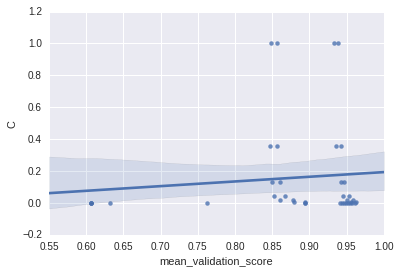

In [57]:
sns.regplot(x = 'mean_validation_score', y = 'C', data = df)

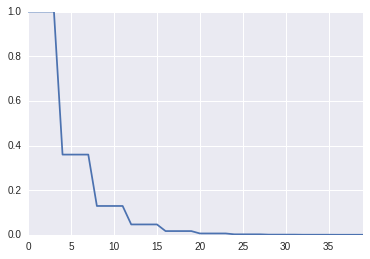

In [71]:
df['C'].plot()

In [72]:
y_true, y_pred = y_test, est.predict(x_test)
print classification_report(y_true, y_pred, target_names=["Is not spam", 'Is spam'])

             precision    recall  f1-score   support

Is not spam       0.99      0.99      0.99       804
    Is spam       0.98      0.98      0.98       577

avg / total       0.98      0.98      0.98      1381

